In [1]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

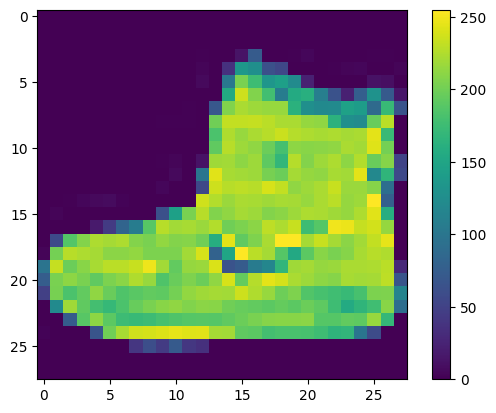

In [10]:
plt.figure()

plt.imshow(train_images[0])

plt.colorbar()

plt.grid(False)

plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

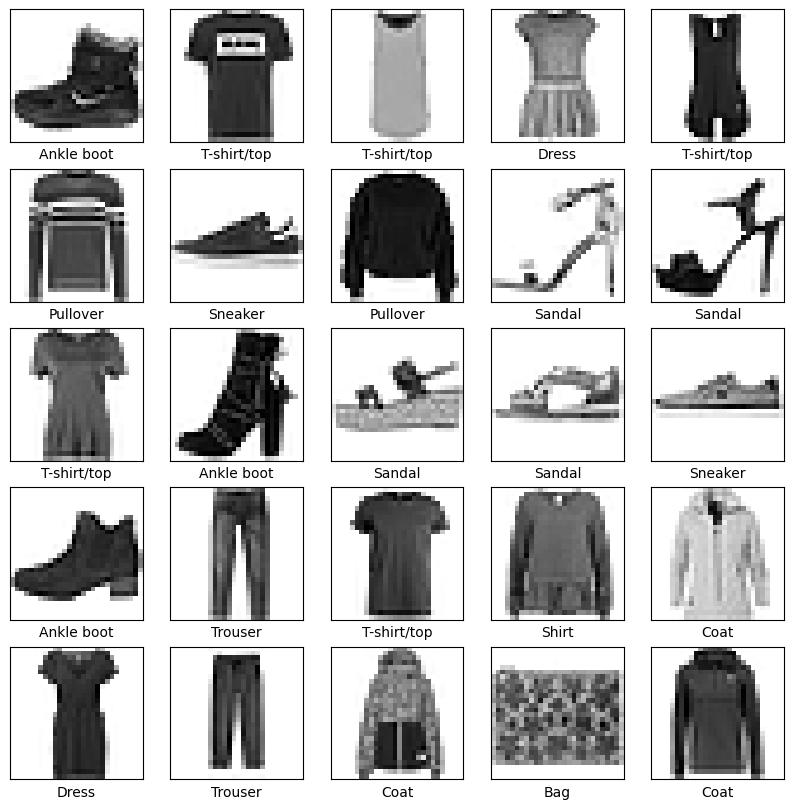

In [12]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

c:\Users\crist\Documents\Samsung-Innovation-Campus\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7801 - loss: 0.6273
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8608 - loss: 0.3876
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8761 - loss: 0.3369
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8853 - loss: 0.3136
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8913 - loss: 0.2961
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8960 - loss: 0.2781
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9023 - loss: 0.2652
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9058 - loss: 0.2552
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9060 - loss: 0.2473
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9140 - loss: 0.2312


In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8880 - loss: 0.3203

Test accuracy: 0.8880000114440918


In [17]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.1417593e-06, 6.4806926e-07, 2.2460265e-09, 8.3032274e-09,
       5.3576246e-09, 1.9446480e-04, 2.4212420e-07, 5.0018523e-02,
       2.8491792e-07, 9.4978452e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

np.int64(9)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])


c:\Users\crist\Documents\Samsung-Innovation-Campus\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7526 - loss: 0.6992 - val_accuracy: 0.8353 - val_loss: 0.4460
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8474 - loss: 0.4127 - val_accuracy: 0.8576 - val_loss: 0.3958
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8614 - loss: 0.3772 - val_accuracy: 0.8635 - val_loss: 0.3784
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8721 - loss: 0.3461 - val_accuracy: 0.8684 - val_loss: 0.3572
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8772 - loss: 0.3328 - val_accuracy: 0.8683 - val_loss: 0.3654
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8797 - loss: 0.3227 - val_accuracy: 0.8738 - val_loss: 0.3541
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8828 - loss: 0.3113 - val_accuracy: 0.8816 - val_loss: 0.3336
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8862 - loss: 0.2995 - 

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8784 - loss: 0.3374

Test accuracy: 0.8784000277519226


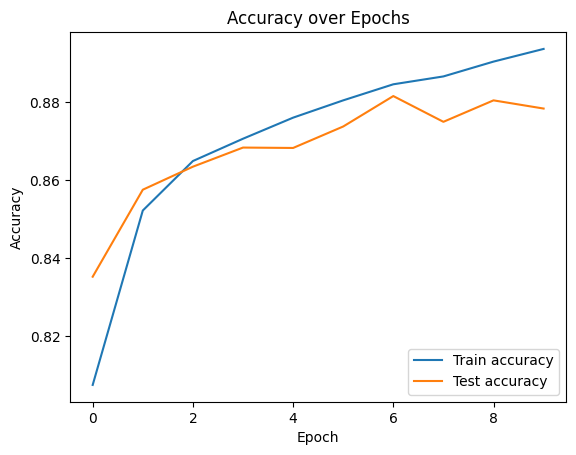

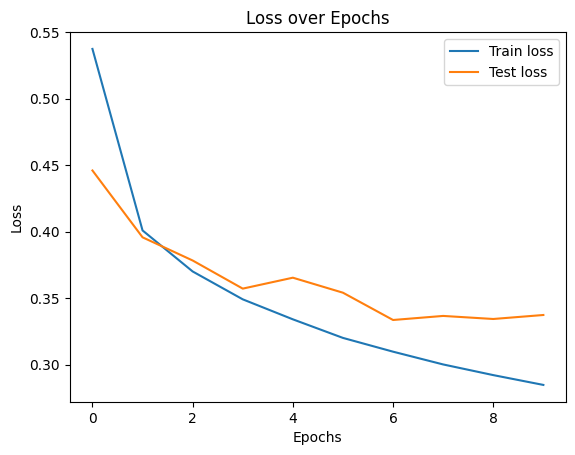

In [ ]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over Epochs')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


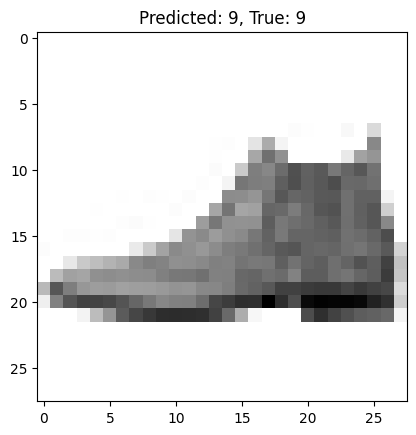

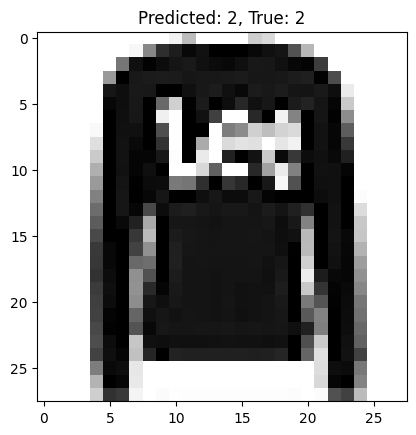

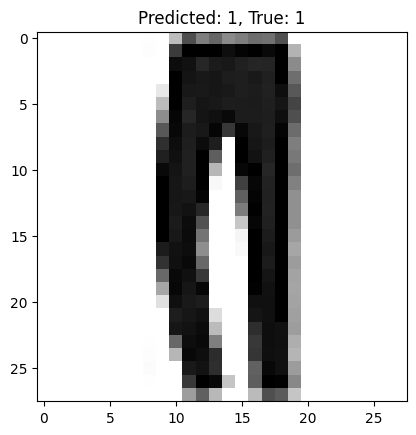

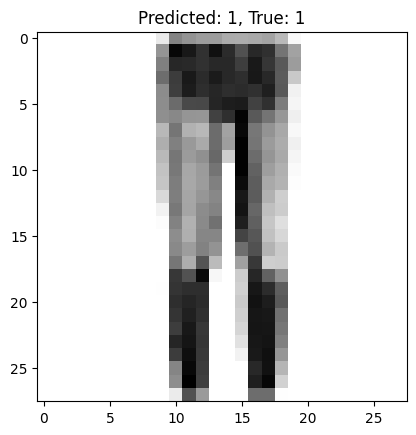

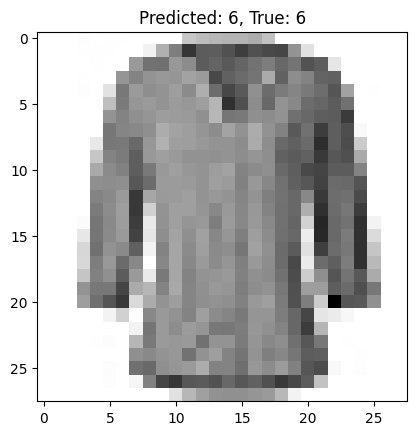

In [ ]:
predictions = model.predict(test_images)

for i in range(5):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {test_labels[i]}")
    plt.show()

c:\Users\crist\Documents\Samsung-Innovation-Campus\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7503 - loss: 0.7032 - val_accuracy: 0.8427 - val_loss: 0.4383
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8487 - loss: 0.4165 - val_accuracy: 0.8574 - val_loss: 0.4046
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8658 - loss: 0.3709 - val_accuracy: 0.8607 - val_loss: 0.3864
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8659 - loss: 0.3619 - val_accuracy: 0.8643 - val_loss: 0.3710
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8740 - loss: 0.3375 - val_accuracy: 0.8688 - val_loss: 0.3643
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8790 - loss: 0.3282 - val_accuracy: 0.8680 - val_loss: 0.3670
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8833 - loss: 0.3153 - val_accuracy: 0.8770 - val_loss: 0.3415
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8882 - loss: 0.3002 - 

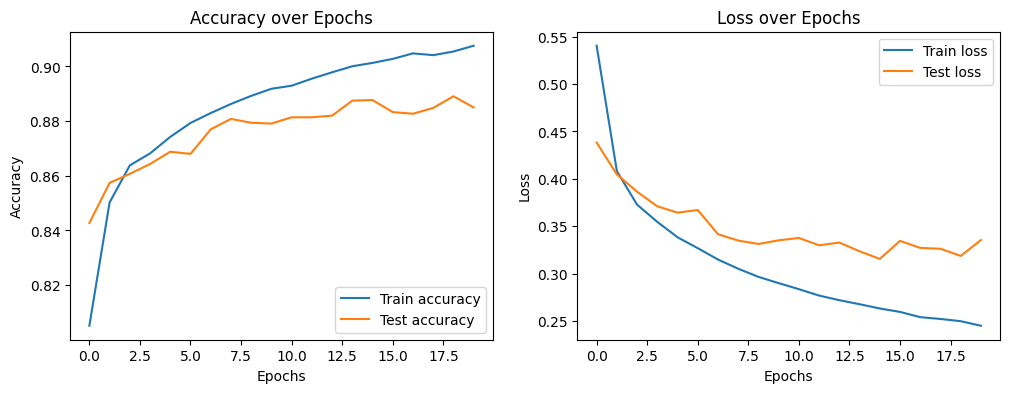

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


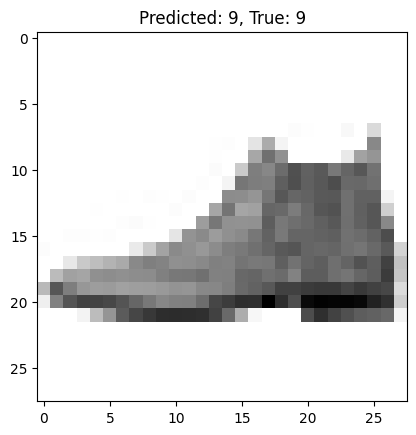

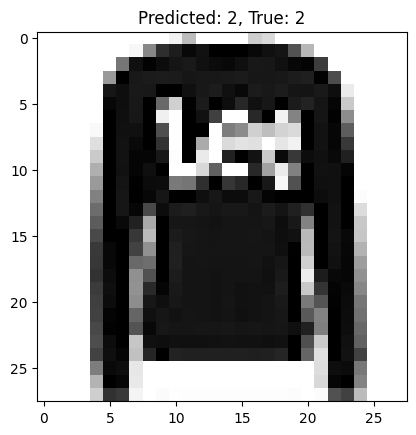

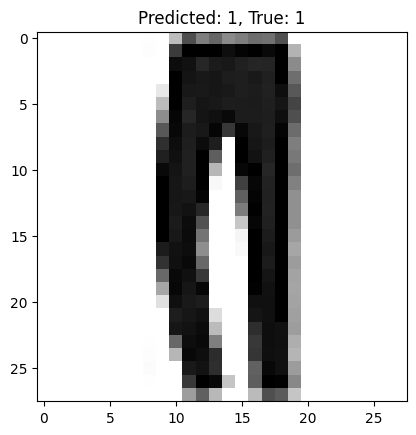

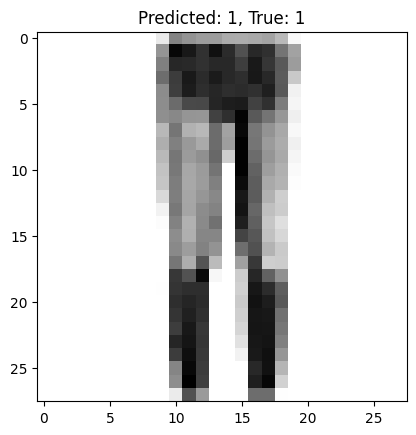

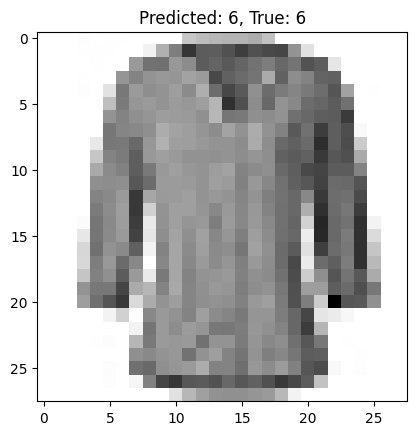

In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preprocesar datos
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

# Mejorar el modelo con más capas y Dropout para evitar sobreajuste
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Aplana las imágenes de 28x28 a un vector de 784
    tf.keras.layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas y ReLU
    tf.keras.layers.Dropout(0.2),  # Dropout con una tasa del 20% para prevenir sobreajuste
    tf.keras.layers.Dense(64, activation='relu'),  # Otra capa oculta con 64 neuronas
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por clase)
])

# Compilación del modelo
model.compile(optimizer='adam',  # Usamos Adam como optimizador
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # 'from_logits=False' porque usamos Softmax
              metrics=['accuracy'])

# Entrenar el modelo durante más épocas
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Graficar precisión y pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over Epochs')

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over Epochs')

plt.show()

# Realizar predicciones y mostrar ejemplos de imágenes con las etiquetas predichas
predictions = model.predict(test_images)

# Mostrar algunas predicciones junto con las imágenes
for i in range(5):  # Mostrar las primeras 5 imágenes
    plt.imshow(test_images[i], cmap=plt.cm.binary)  # Mostrar la imagen en escala de grises
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {test_labels[i]}")  # Mostrar predicción vs. etiqueta real
    plt.show()